In [1]:
%load_ext autoreload
%autoreload 2

In [35]:
from autoplan.trainer import ClassifierTrainer
from autoplan.dataset import PrelabeledDataset
from autoplan.vis import plot_accuracy, plot_cm

from tqdm import tqdm_notebook as tqdm
import pandas as pd
import torch
import os

device = torch.device('cuda:0')
REPO_DIR = os.path.expanduser('~/autoplan')

In [36]:
dataset_name = 'T1Acc'
dataset = PrelabeledDataset.load(f'{REPO_DIR}/data/rainfall/{dataset_name}.pkl')

In [37]:
trainer = ClassifierTrainer(dataset, device=device, val_frac=0.2, batch_size=5)
losses = []
train_eval = []
val_eval = []

In [38]:
for _ in tqdm(range(50)):
    losses.append(trainer.train_one_epoch())
    train, val = trainer.eval()
    train_eval.append(train)
    val_eval.append(val)

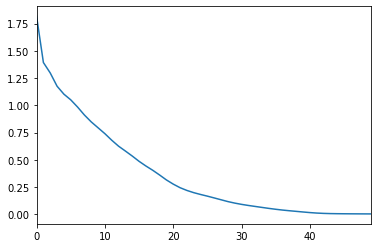

In [39]:
pd.Series(losses).plot()

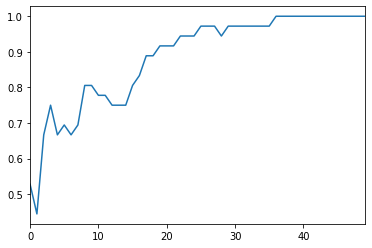

In [40]:
plot_accuracy(train_eval)

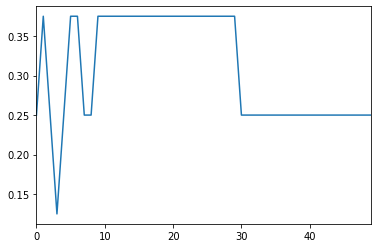

In [41]:
plot_accuracy(val_eval)

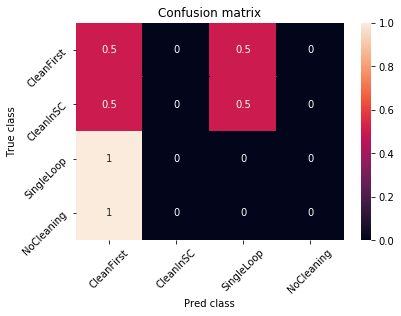

In [42]:
val_eval[-1].plot_cm()